<a href="https://colab.research.google.com/github/MRaynardAlif/HVAC-Anomaly-Detection-Model/blob/main/RandomForest_AC_AnomalyDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve, validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Data Collection
data = pd.read_csv('/content/drive/MyDrive/HVAC_DATASET/air_conditioner_combined_labeled55K.csv')

# Select Features and Target Variable
features = data[['UNIT', 'SET', 'DELTA', 'ALPHA', 'VOLT', 'AMPERE', 'SUHU PIPA', 'ROOM', 'SUPPLY', 'RETURN']]
labels = data['CONDITION']

# Encode Categorical Features using One-Hot Encoding
features = pd.get_dummies(features, columns=['UNIT'])

# Split Data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Choose a Model and Tune Hyperparameters
print("Tuning hyperparameters...")
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Hyperparameter tuning completed.")

print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Train the Model with Best Parameters
print("Training the model with best parameters...")
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
print("Training completed.")

# Evaluate the Model
print("Evaluating the model...")
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Evaluation completed.")


Tuning hyperparameters...
Hyperparameter tuning completed.
Best parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Training the model with best parameters...
Training completed.
Evaluating the model...
Classification Report:
                precision    recall  f1-score   support

     Abnormal       1.00      1.00      1.00       995
Maintenance 1       1.00      1.00      1.00      1045
Maintenance 2       1.00      1.00      1.00       979
Maintenance 3       1.00      1.00      1.00       961
Maintenance 4       1.00      1.00      1.00       986
       Normal       1.00      1.00      1.00      1008
    Trouble 1       1.00      1.00      1.00      1025
    Trouble 2       1.00      1.00      1.00      1002
    Trouble 3       1.00      1.00      1.00      1006
    Trouble 4       1.00      1.00      1.00       980
   Trouble 5a       1.00      1.00      1.00       505
   Trouble 5b       1.00      1.00      1

Cross-Validation Scores: [0.99972727 0.99945455 0.99954545 0.99963636 0.99936364]
Mean CV Score: 0.9995454545454544
Standard Deviation of CV Scores: 0.00012856486930663797


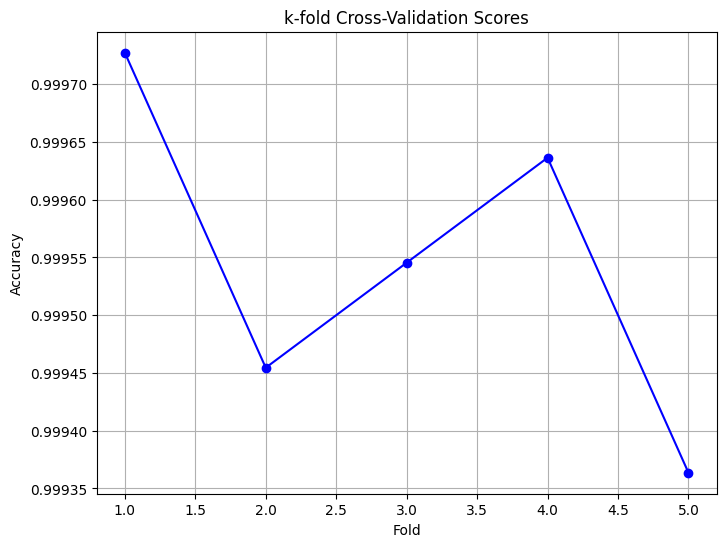

In [ ]:

# Perform 5-fold cross-validation (You can adjust the value of 'cv' parameter)
cv_scores = cross_val_score(best_model, features, labels, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

# Plot the cross-validation results
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('k-fold Cross-Validation Scores')
plt.grid(True)
plt.show()


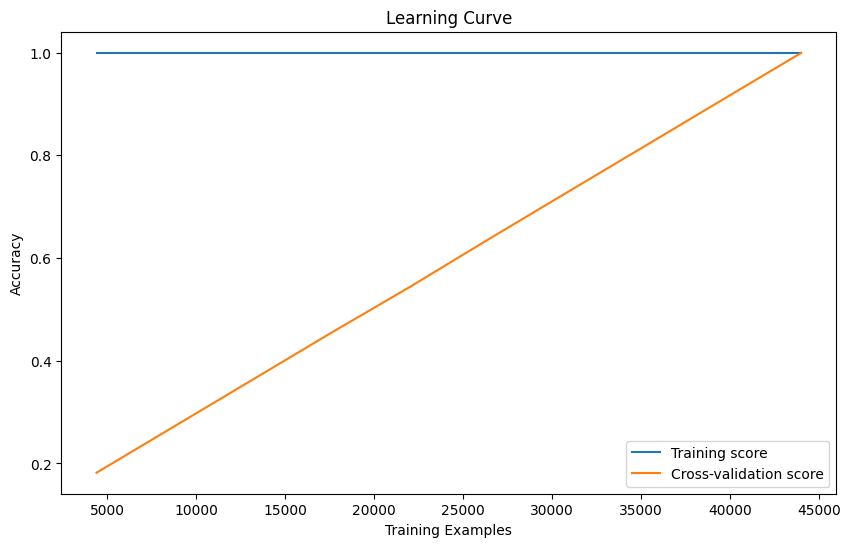

In [ ]:
# Plot Learning Curve
train_sizes, train_scores_lc, test_scores_lc = learning_curve(best_model, features, labels, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores_lc, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores_lc, axis=1), label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

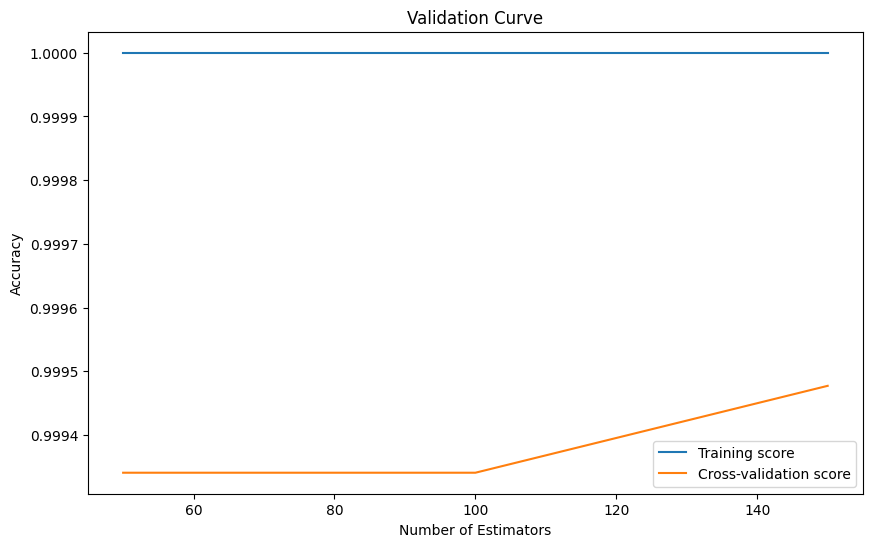

In [ ]:
# Plot Validation Curve (e.g., for n_estimators)
param_range = [50, 100, 150]
train_scores, test_scores = validation_curve(best_model, X_train, y_train,
                                             param_name="n_estimators", param_range=param_range,
                                             cv=5, scoring="accuracy")
plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

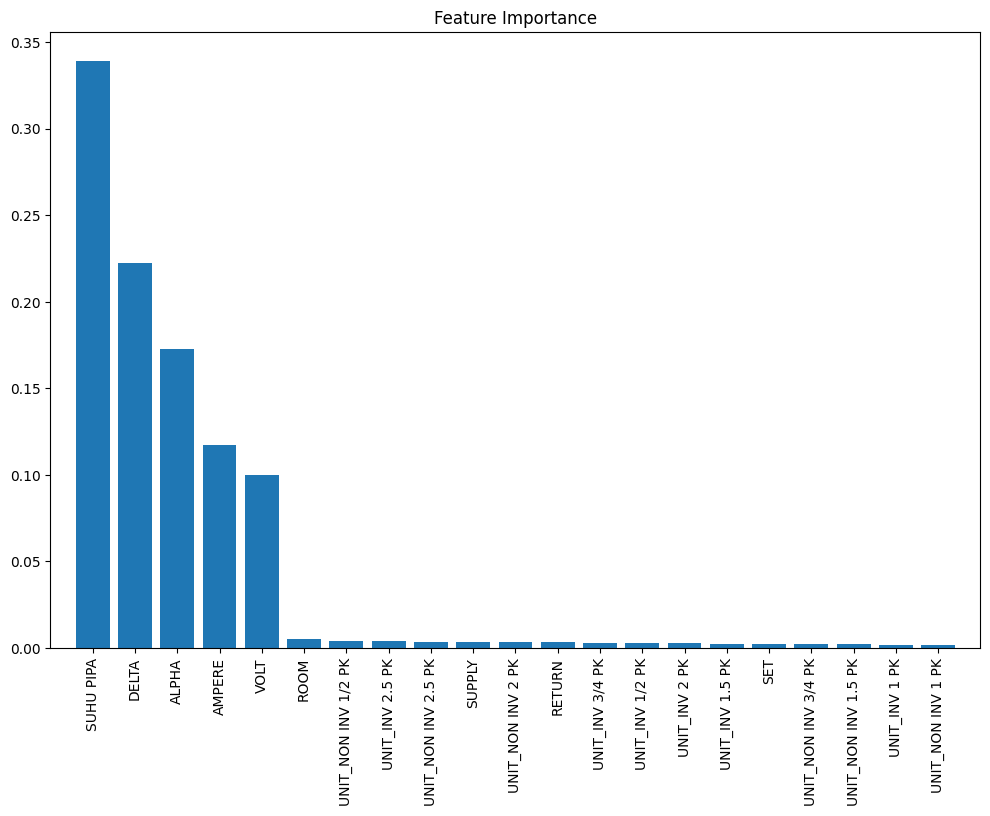

In [ ]:
# Plot Feature Importance
feature_importances = best_model.feature_importances_
features_names = X_train.columns
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [features_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

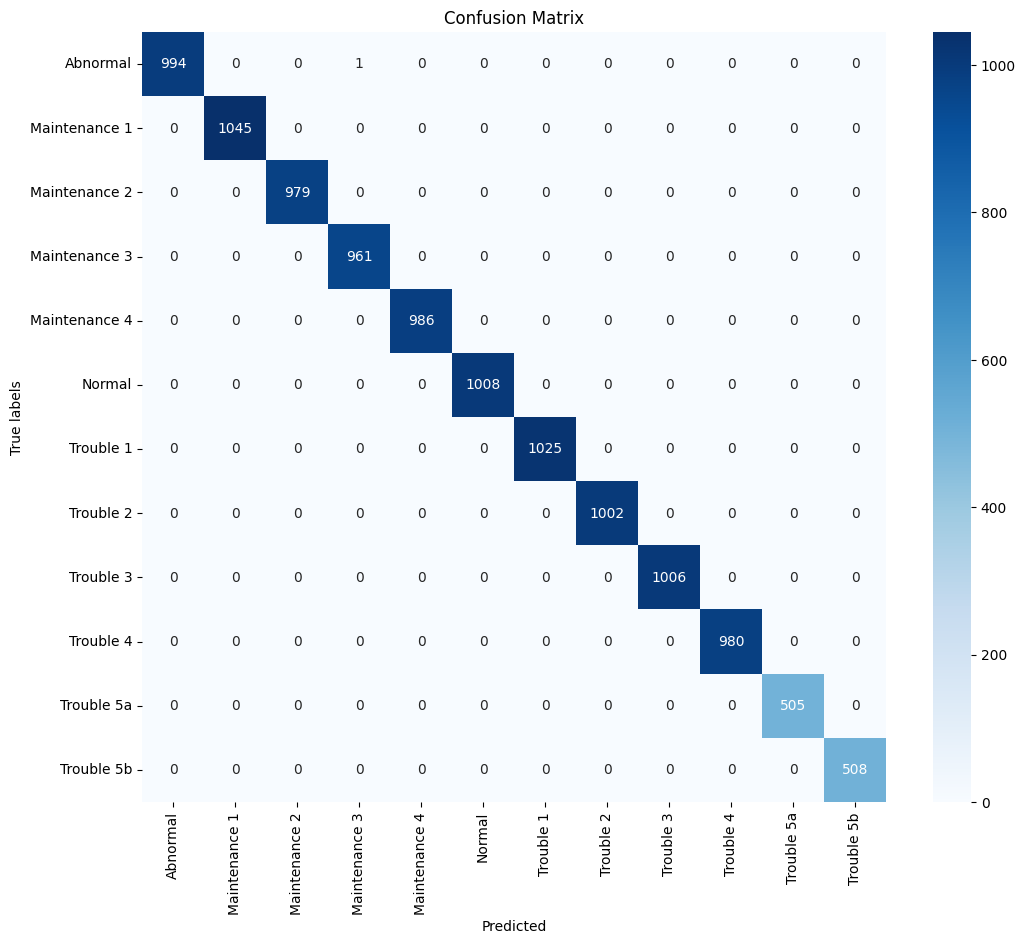

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for comparing the model's predictions against the true labels
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True labels')
plt.show()


Classification Report:
               precision    recall  f1-score   support

     Abnormal       1.00      0.99      1.00      2000
Maintenance 1       1.00      1.00      1.00      2000
Maintenance 2       1.00      1.00      1.00      2000
Maintenance 3       1.00      1.00      1.00      2000
Maintenance 4       1.00      1.00      1.00      2000
       Normal       1.00      1.00      1.00      2000
    Trouble 1       1.00      1.00      1.00      2000
    Trouble 2       1.00      1.00      1.00      2000
    Trouble 3       1.00      1.00      1.00      2000
    Trouble 4       1.00      1.00      1.00      2000
   Trouble 5a       1.00      1.00      1.00      2500
   Trouble 5b       1.00      1.00      1.00      2500

     accuracy                           1.00     25000
    macro avg       1.00      1.00      1.00     25000
 weighted avg       1.00      1.00      1.00     25000



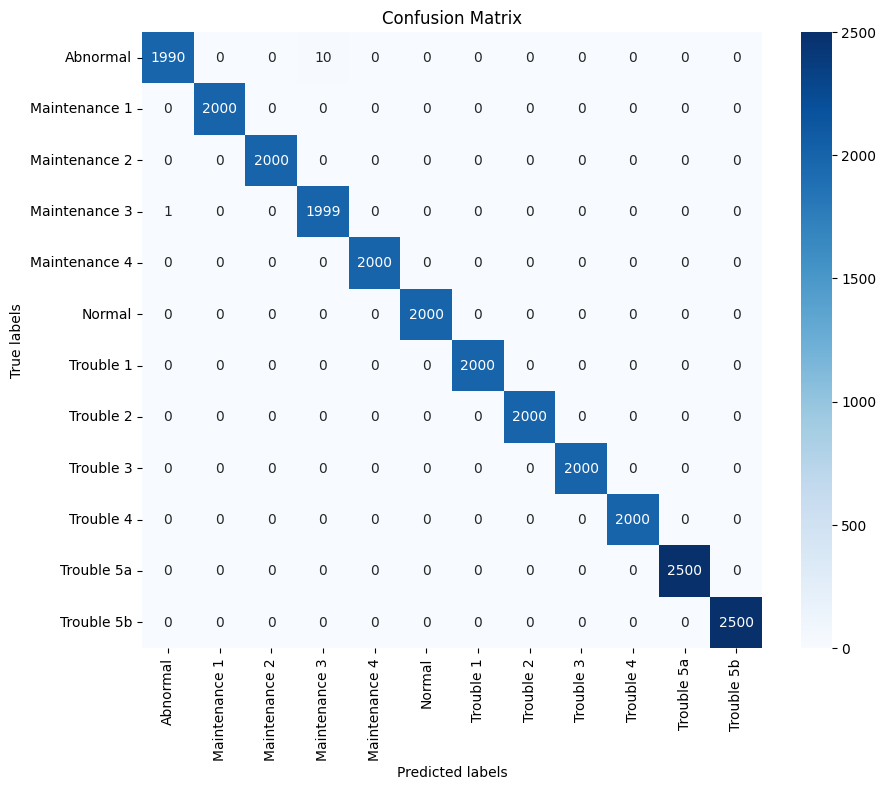

In [ ]:
# Test the saved model with test dataset
# Load the saved model
saved_model_path = "/content/drive/MyDrive/HVAC_DATASET/RandomForest_Model/RandomForest_AC_AnomalyDetect.pkl"
saved_model = joblib.load(saved_model_path)

# Load the testing data
test_data_path = "/content/drive/MyDrive/HVAC_DATASET/TestData/air_conditioner_combined_test55K.csv"
test_data = pd.read_csv(test_data_path)

# Preprocess the testing data
test_features = test_data[['UNIT', 'SET', 'DELTA', 'ALPHA', 'VOLT', 'AMPERE', 'SUHU PIPA', 'ROOM', 'SUPPLY', 'RETURN']]
test_features = pd.get_dummies(test_features, columns=['UNIT'])

# If you have labels in your test data and you want to evaluate predictions:
test_labels = test_data['CONDITION']

# Make predictions
predictions = saved_model.predict(test_features)

# If you have labels in your test data and you want to evaluate predictions:
print("Classification Report:")
print(classification_report(test_labels, predictions))

# Plot the confusion matrix
cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install onnxruntime
!pip install skl2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,

In [ ]:
# Save the Trained Model
model_path = "/content/drive/MyDrive/HVAC_DATASET/RandomForest_Model/RandomForest_AC_AnomalyDetect.pkl"
joblib.dump(best_model, model_path)
print(f"Trained model saved at {model_path}")


Trained model saved at /content/drive/MyDrive/HVAC_DATASET/RandomForest_Model/RandomForest_AC_AnomalyDetect.pkl


In [ ]:
import json
import tensorflow as tf
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Extract relevant information from the model
model_info = {
    "n_estimators": best_model.n_estimators,
    "max_depth":best_model.max_depth,
    "min_samples_split": best_model.min_samples_split,
    "min_samples_leaf": best_model.min_samples_leaf,
    "class_labels": best_model.classes_.tolist(),
    "feature_importances": best_model.feature_importances_.tolist(),
    # Add model information as needed
}

# Save the model information to a JSON file
json_path = "/content/drive/MyDrive/HVAC_DATASET/RandomForest_Model/RandomForest_AC_AnomalyDetect.json"
with open(json_path, "w") as json_file:
    json.dump(model_info, json_file)
print("Model saved in JSON format.")

# Convert the model to ONNX format
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]
onnx_model = convert_sklearn(best_model, initial_types=initial_type)
onnx_model_path = "/content/drive/MyDrive/HVAC_DATASET/RandomForest_Model/RandomForest_AC_AnomalyDetect.onnx"
with open(onnx_model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())
print(f"ONNX model saved at {onnx_model_path}")


Model saved in JSON format.
ONNX model saved at /content/drive/MyDrive/HVAC_DATASET/RandomForest_Model/RandomForest_AC_AnomalyDetect.onnx


In [ ]:
!pip install tensorflowjs


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 29.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnxconverter-common 1.14.0 requires protobuf==3.20.2, but you have protobuf 4.25.3 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.25.3 which is incompatible.


In [ ]:
import joblib
import tensorflow as tf

# Load the scikit-learn model
model_path = "/content/drive/MyDrive/HVAC_DATASET/RandomForest_Model/RandomForest_AC_AnomalyDetect.pkl"
model = joblib.load(model_path)

# Define the number of features in the scikit-learn model
num_features = len(model.feature_importances_)

# Convert the scikit-learn model to TensorFlow model
def build_model(num_classes):
    return tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(num_features,)),
        tf.keras.layers.Dense(units=num_classes, activation='softmax')
    ])

# Create the TensorFlow model
tf_model = build_model(num_classes=len(model.classes_))

# Set the weights of the TensorFlow model
weights = [model.feature_importances_.reshape(-1, 1).T, tf.zeros((len(model.classes_),))]
tf_model.set_weights(weights)

# Convert the TensorFlow model to TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(tf_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
tflite_model_path = '/content/drive/MyDrive/HVAC_DATASET/RandomForest_Model/RandomForest_AC_AnomalyDetect.tflite'
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f"TensorFlow Lite model saved at {tflite_model_path}")


ValueError: Layer sequential_9 weight shape (4, 3) is not compatible with provided weight shape (1, 4).

In [ ]:
import pandas as pd
import joblib

# Test the saved model with user input data
# Load the trained model
best_model = joblib.load('/content/drive/MyDrive/HVAC_DATASET/RandomForest_Model/RandomForest_AC_AnomalyDetect.pkl')

# Collect user input
user_input_data = {
    'UNIT': input("Enter value for UNIT: "),
    'SET': float(input("Enter value for SET: ")),
    'DELTA': float(input("Enter value for DELTA: ")),
    'ALPHA': float(input("Enter value for ALPHA: ")),
    'VOLT': float(input("Enter value for VOLT: ")),
    'AMPERE': float(input("Enter value for AMPERE: ")),
    'SUHU PIPA': float(input("Enter value for SUHU PIPA: ")),
    'ROOM': float(input("Enter value for ROOM: ")),
    'SUPPLY': float(input("Enter value for SUPPLY: ")),
    'RETURN': float(input("Enter value for RETURN: "))
}

# Convert user input data to DataFrame
user_df = pd.DataFrame(user_input_data, index=[0])

# Perform one-hot encoding for 'UNIT' column
user_df = pd.get_dummies(user_df, columns=['UNIT'])

# Ensure column names match those used during model training
missing_columns = set(best_model.feature_names_in_) - set(user_df.columns)
for column in missing_columns:
    user_df[column] = 0

# Reorder columns to match the order during model training
user_df = user_df[best_model.feature_names_in_]

# Make predictions
predictions = best_model.predict(user_df)

# Print prediction
print(f"Predicted Condition: {predictions}")


Enter value for UNIT: INV 2.5 PK
Enter value for SET: 21
Enter value for DELTA: 16
Enter value for ALPHA: 14
Enter value for VOLT: 235
Enter value for AMPERE: 12
Enter value for SUHU PIPA: 25
Enter value for ROOM: 30
Enter value for SUPPLY: 15
Enter value for RETURN: 22
Predicted Condition: ['Trouble 3']


In [ ]:
# JavaScript Deployment Code
'''

// Import TensorFlow.js library
const tf = require('@tensorflow/tfjs');

async function predictCondition() {
    // Load the model
    const model = await tf.loadLayersModel('/content/drive/MyDrive/HVAC_DATASET/RandomForest_Model/RandomForest_AC_AnomalyDetect.json');

    // Collect user input
    const userInput = {};

    userInput['UNIT'] = prompt("Enter value for UNIT:");
    userInput['SET'] = parseFloat(prompt("Enter value for SET:"));
    userInput['DELTA'] = parseFloat(prompt("Enter value for DELTA:"));
    userInput['ALPHA'] = parseFloat(prompt("Enter value for ALPHA:"));
    userInput['VOLT'] = parseFloat(prompt("Enter value for VOLT:"));
    userInput['AMPERE'] = parseFloat(prompt("Enter value for AMPERE:"));
    userInput['SUHU PIPA'] = parseFloat(prompt("Enter value for SUHU PIPA:"));
    userInput['ROOM'] = parseFloat(prompt("Enter value for ROOM:"));
    userInput['SUPPLY'] = parseFloat(prompt("Enter value for SUPPLY:"));
    userInput['RETURN'] = parseFloat(prompt("Enter value for RETURN:"));

    // Perform one-hot encoding for 'UNIT' column
    let userInputArray = Object.values(userInput);
    userInputArray = [userInputArray.slice(1), userInputArray[0]]; // move 'UNIT' to the end
    const userInputTensor = tf.tensor2d([userInputArray]);

    // Make predictions
    const predictions = model.predict(userInputTensor);
    const predictedCondition = predictions.dataSync()[0];

    return predictedCondition;
}

// Example usage:
predictCondition()
    .then(prediction => console.log("Predicted Condition:", prediction))
    .catch(error => console.error("Error:", error));

'''

In [ ]:
# Java Deployment Code

'''
import ai.onnxruntime.OnnxTensor;
import ai.onnxruntime.OrtEnvironment;
import ai.onnxruntime.OrtException;
import ai.onnxruntime.OrtSession;

import java.util.HashMap;
import java.util.Map;
import java.util.Scanner;

public class Main {

    public static void main(String[] args) {
        try {
            // Load the ONNX model
            OrtEnvironment env = OrtEnvironment.getEnvironment();
            OrtSession session = env.createSession("/content/drive/MyDrive/HVAC_DATASET/RandomForest_Model/RandomForest_AC_AnomalyDetect.onnx");

            // Collect user input
            Scanner scanner = new Scanner(System.in);
            Map<String, Object> userInput = new HashMap<>();
            userInput.put("UNIT", getUserInput("UNIT", scanner));
            userInput.put("SET", getUserInputAsFloat("SET", scanner));
            userInput.put("DELTA", getUserInputAsFloat("DELTA", scanner));
            userInput.put("ALPHA", getUserInputAsFloat("ALPHA", scanner));
            userInput.put("VOLT", getUserInputAsFloat("VOLT", scanner));
            userInput.put("AMPERE", getUserInputAsFloat("AMPERE", scanner));
            userInput.put("SUHU PIPA", getUserInputAsFloat("SUHU PIPA", scanner));
            userInput.put("ROOM", getUserInputAsFloat("ROOM", scanner));
            userInput.put("SUPPLY", getUserInputAsFloat("SUPPLY", scanner));
            userInput.put("RETURN", getUserInputAsFloat("RETURN", scanner));

            // Perform inference
            float[] inputValues = getUserInputValues(userInput);
            OnnxTensor inputTensor = OnnxTensor.createTensor(env, inputValues);
            OnnxTensor outputTensor = session.run(inputTensor);
            float[] predictions = (float[]) outputTensor.getValue();
            float predictedCondition = predictions[0];

            // Print prediction
            System.out.println("Predicted Condition: " + predictedCondition);
        } catch (OrtException e) {
            e.printStackTrace();
        }
    }

    private static String getUserInput(String prompt, Scanner scanner) {
        System.out.print("Enter value for " + prompt + ": ");
        return scanner.nextLine();
    }

    private static float getUserInputAsFloat(String prompt, Scanner scanner) {
        System.out.print("Enter value for " + prompt + ": ");
        return Float.parseFloat(scanner.nextLine());
    }

    private static float[] getUserInputValues(Map<String, Object> userInput) {
        float[] inputValues = new float[10];
        inputValues[0] = Float.parseFloat((String) userInput.get("SET"));
        inputValues[1] = (float) userInput.get("DELTA");
        inputValues[2] = (float) userInput.get("ALPHA");
        inputValues[3] = (float) userInput.get("VOLT");
        inputValues[4] = (float) userInput.get("AMPERE");
        inputValues[5] = (float) userInput.get("SUHU PIPA");
        inputValues[6] = (float) userInput.get("ROOM");
        inputValues[7] = (float) userInput.get("SUPPLY");
        inputValues[8] = (float) userInput.get("RETURN");
        // Assuming 'UNIT' is categorical and encoded properly before passing to the model
        // If not, you'll need to encode it appropriately before putting it into the inputValues array
        // For simplicity, it's not included in this conversion
        inputValues[9] = 0; // Placeholder for 'UNIT'
        return inputValues;
    }
}

'''

#Model Link:
##1. For Mobile Deployment(ONNX): https://drive.google.com/file/d/1--NXg1AMTRjaPUKxLgx6ogrC6Ziwtxnj/view?usp=sharing

##2. For Website Deployment(JSON): https://drive.google.com/file/d/1-9L57L5DN_gWBvbaR1U8Q_13_Zd-1Anv/view?usp=sharing


#Dataset Link:
#https://drive.google.com/file/d/15eKp_NOCxK-kCUbsQVbcStmJQYc_l50h/view?usp=sharing

##The dataset refers to the operating parameters of an Air Conditioner system

#Test Dataset Link:
#https://drive.google.com/file/d/1zmTF5djVT21sOFc4VSPgk8_mA0dEn4gj/view?usp=sharing


#Parameter: https://docs.google.com/spreadsheets/d/1nxVdoekDJfltkRx0bAzJLHE25HGNZR8r/edit?usp=sharing&ouid=102219445333014140939&rtpof=true&sd=true